In [1]:
import pickle as _pkl
import numpy as _nmp
import pandas as _pnd
import matplotlib.pyplot as _plt

%matplotlib inline

In [2]:
mdls = {
    'logit': 'Normal.logit',
    'arcsin': 'Normal.arcsin',
    'log': 'Normal.log',
    'bcox': 'Normal.boxcox',
    'blom': 'Normal.blom',
    'voom': 'Normal.voom',
    'vst': 'Normal.vst',
    'bin': 'Binomial.none',
    'nbin': 'NBinomial.none',
    'pois': 'Poisson.none'
}

In [7]:
## load results

def load_results():
    ##
    res, hits = {}, {}
    fin_dir = '/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/raw'
    for key in mdls:
        fin = '{}/TF.common.HIGH.{}.452.{}.pkl'.format(fin_dir, 'protein_coding', mdls[key])
        print(fin)
        with open(fin, 'rb') as fh:
            res[key] = _pkl.load(fh)
            beta = res[key]['beta']
            thr = 0.25 #if key in ('bin', 'nbin', 'pois') else 1e-6
            idxs = _nmp.abs(beta) > thr * _nmp.max(_nmp.abs(beta)) 
            beta[~idxs] = 0
            hits[key] = idxs
            
    ##
    return res, hits

##
res, hits = load_results()

/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/raw/TF.common.HIGH.protein_coding.452.Normal.boxcox.pkl
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/raw/TF.common.HIGH.protein_coding.452.Normal.blom.pkl
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/raw/TF.common.HIGH.protein_coding.452.Normal.logit.pkl
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/raw/TF.common.HIGH.protein_coding.452.NBinomial.none.pkl
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/raw/TF.common.HIGH.protein_coding.452.Normal.arcsin.pkl
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/raw/TF.common.HIGH.protein_coding.452.Normal.log.pkl
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/raw/TF.common.HIGH.protein_coding.452.Poisson.none.pkl
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/raw/TF.common.HIGH.protein_coding.452.Normal.voom.pkl
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/raw/TF.common.HIGH.protein_coding.452.Binomial.none.pkl
/home/dim

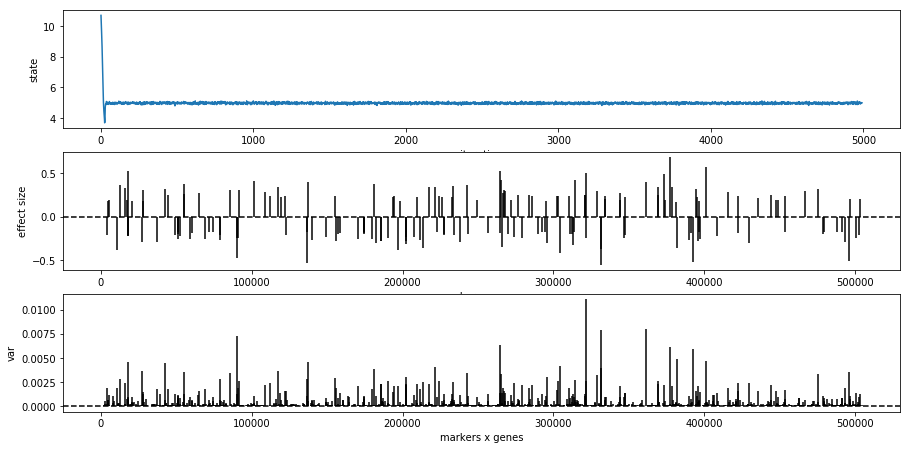

In [8]:
## plot
mdl = 'logit'
_plt.figure(figsize = (15,10));
_plt.subplot(4,1,1); _plt.plot(res[mdl]['state'][10:]); _plt.xlabel('iteration'); _plt.ylabel('state')
_plt.subplot(4,1,2); _plt.vlines(range(res[mdl]['beta'].size), 0, res[mdl]['beta']); _plt.xlabel('markers x genes'); _plt.ylabel('effect size')
_plt.axhline(linestyle='--', color='k');
_plt.subplot(4,1,3); _plt.vlines(range(res[mdl]['beta_var'].size), 0, res[mdl]['beta_var']); _plt.xlabel('markers x genes'); _plt.ylabel('var')
_plt.axhline(linestyle='--', color='k');

In [9]:
## find interesection

hits_common = (
    hits['arcsin'] &
    hits['logit'] & 
    hits['log'] &
    hits['blom'] & 
    hits['bcox'] & 
    hits['voom'] & 
    hits['vst'] &
    hits['pois'] &
    hits['bin'] & 
    hits['nbin']    
)

hits_common.nonzero()

(array([], dtype=int64), array([], dtype=int64))

In [10]:
## save data

def save_data():
    ##
    fout_dir = '/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/hits'
    for key in mdls:
        fout = '{}/TF.common.HIGH.{}.452.{}.hits.txt'.format(fout_dir, 'protein_coding', mdls[key])
        print(fout)
        _nmp.savetxt(fout, hits[key], fmt='%d')

##
save_data()

/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/hits/TF.common.HIGH.protein_coding.452.Normal.boxcox.hits.txt
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/hits/TF.common.HIGH.protein_coding.452.Normal.blom.hits.txt
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/hits/TF.common.HIGH.protein_coding.452.Normal.logit.hits.txt
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/hits/TF.common.HIGH.protein_coding.452.NBinomial.none.hits.txt
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/hits/TF.common.HIGH.protein_coding.452.Normal.arcsin.hits.txt
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/hits/TF.common.HIGH.protein_coding.452.Normal.log.hits.txt
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/hits/TF.common.HIGH.protein_coding.452.Poisson.none.hits.txt
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/hits/TF.common.HIGH.protein_coding.452.Normal.voom.hits.txt
/home/dimitris/WTCHG/Projects/eQTLseq/results/geuvadis/hits/TF.common.HI

In [ ]:
# load data
def load_data():
    data = {
        'G': _pnd.read_table('/home/dimitris/WTCHG/Projects/eQTLseq/data/geuvadis/genotypes.TF.common.HIGH.no_missing.txt', index_col=0, header=None),
        'Z': _pnd.read_table('/home/dimitris/WTCHG/Projects/eQTLseq/data/geuvadis/counts_miRNA.txt', index_col=0)
    }

    samples = data['G'].index & data['Z'].columns

    data['Z'] = data['Z'][samples].values
    data['G'] = data['G'].loc[samples].values

    ##
    return data

##
data = load_data()

In [ ]:
## add info

def modify_data():
    Z, G = data['Z'], data['G']

    idxs_genes = Z.mean(1) > 10       # keep only expressed tags
    idxs_markers = _nmp.std(G, 0) > 0   # keep only non-monomorphic loci
    
    data_mod = {
        'Z': Z,
        'G': G,
        'idxs_genes': idxs_genes,
        'idxs_markers': idxs_markers
    }
    
    with open('/home/dimitris/WTCHG/Projects/eQTLseq/data/geuvadis/TF.common.HIGH.tfs.452.pkl', 'wb') as fh:
        _pkl.dump(data_mod, fh)

##    
modify_data()    

In [ ]:
res['log']['beta_var']